# Comparing Two Samples

In this workbook, you will learn how to test whether two populations are the same, by simulation and by theory.

In [1]:
from symbulate import *
%matplotlib inline

In [2]:
import numpy as np

import pandas as pd
pd.set_option("display.max_rows", 15)

In [3]:
data = pd.read_csv("/data/harris.csv")
data

,Bsal,Sal77,Sex,Senior,Age,Educ,Exper
0,5040,12420,Male,96,329,15,14.0
1,6300,12060,Male,82,357,15,72.0
2,6000,15120,Male,67,315,15,35.5
3,6000,16320,Male,97,354,12,24.0
4,6000,12300,Male,66,351,12,56.0
5,6840,10380,Male,92,374,15,41.5
6,8100,13980,Male,66,369,16,54.5
...,...,...,...,...,...,...,...
86,5100,10560,Female,84,458,12,36.0
87,4800,9240,Female,84,571,16,214.0


## By Simulation

Let's test whether the beginning salaries of men and women are the same, using simulation. This simulation-based test is usually called a **permutation test**.

Suppose that salaries of men and women are really the same and that any difference is just due to chance. (This is the null hypothesis.) Then, the `Sex` variable is arbitrary as far as salaries are concerned. We can shuffle the `Sex` variable to get the distribution of differences between the salaries of men and women, assuming the null hypothesis is true.

**Step 1.** To shuffle the `Sex` column, we can simply put that column into a box model and pull out all the tickets without replacement. The set of tickets we get will be the same every time, but the order will be different.

In [4]:
model = BoxModel(box=list(data["Sex"]), size=len(data), replace=False)
model.sim(100)

0,"('Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', '..."
1,"('Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', '..."
2,"('Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male',..."
3,"('Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',..."
4,"('Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female..."
5,"('Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Fe..."
6,"('Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Fema..."
7,"('Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', '..."
8,"('Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Fe..."
...,...
99,"('Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Fema..."


**Step 2.** Let's define a function that, given a sex column, returns the difference in average beginning salary between men and women. 

(Note the use of vectorization and boolean masking!)

In [5]:
def calculate_difference(sex):
    sex = np.array(sex)
    return data[sex == "Male"]["Bsal"].mean() - data[sex == "Female"]["Bsal"].mean()

diffs = RV(model, calculate_difference)
sims = diffs.sim(10000)

**Step 3.** Let's plot the distribution of the differences and locate the observed difference on this distribution to obtain a $p$-value.

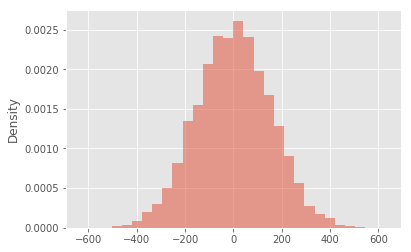

In [6]:
sims.plot(type="bar", bins=30)

In [7]:
obs_diff = calculate_difference(data["Sex"])
obs_diff

818.0225409836066

In [8]:
sims.count_geq(obs_diff) / 10000

0.0

## By Theory

Under the null hypothesis that the populations are the same, the observed difference $\bar X_1 - \bar X_2$ approximately follows a 

$$\textrm{Normal}\left(0, \sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}\right)$$ 

distribution. Let's repeat the above analysis using this theoretical approximation. Do we get the same answer?

**Step 1.** Calculate the standard error.

In [9]:
m = data[data["Sex"] == "Male"]["Bsal"]
f = data[data["Sex"] == "Female"]["Bsal"]

se = np.sqrt(m.var() / m.count() + f.var() / f.count())

**Step 2.** Simulate from the normal distribution, and compare the observed difference to this distribution to obtain a $p$-value.

0.0

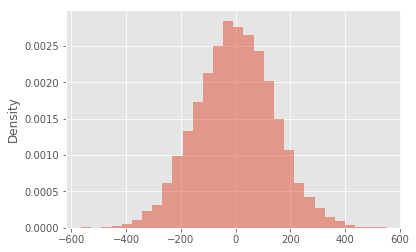

In [10]:
Z = RV(Normal(mean=0, sd=se))
sims = Z.sim(10000)
sims.plot(type="bar", bins=30)

sims.count_geq(obs_diff) / 10000

## Now You Try It!

The main contention in the Harris Bank lawsuit was that men and women were treated differently in terms of salary _increases_. Test the null hypothesis that salary _increases_ did not differ between men and women. Try doing this by simulation and by theory.